In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
#from sklearn.svm import svc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
df = pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [34]:
# Check shape and datatype
print("Shape",df.shape)
display(df.head())

# dtypes and missing values
print(df.dtypes.value_counts())
print("Nan counts:\n", df.isnull().sum())


Shape (2000, 26)


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


object     23
float64     2
int64       1
Name: count, dtype: int64
Nan counts:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [35]:
# Drop rows with missing only if few values
df_clean = df.dropna()

In [36]:
from sklearn.preprocessing import LabelEncoder

# one-hot encode features
target = 'class'
X = pd.get_dummies(df_clean.drop(columns=[target]), drop_first=False)
Y =LabelEncoder().fit_transform(df_clean[target].astype(str))

In [37]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [38]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shapes:", X_train.shape, X_test.shape)

Shapes: (1600, 127) (400, 127)


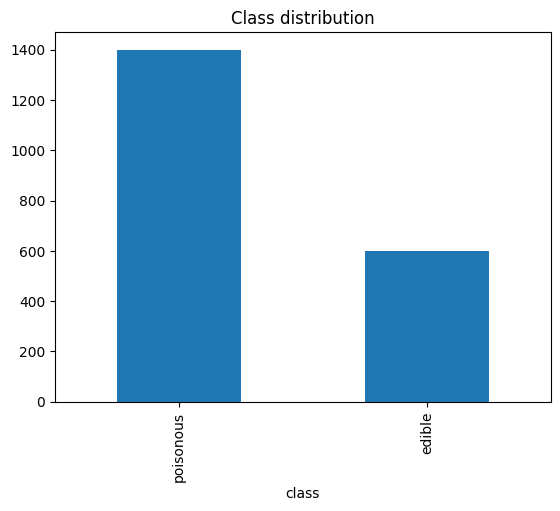

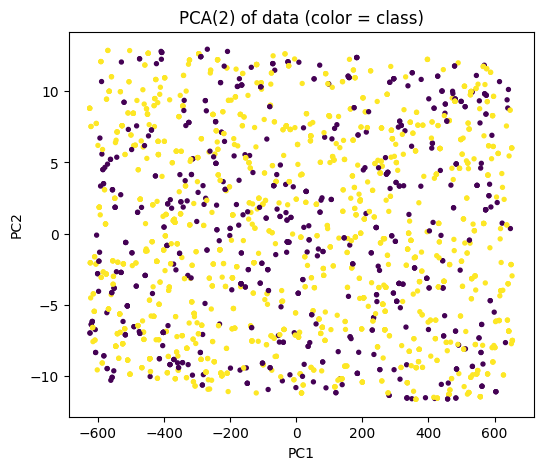

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Data Visualization
# Class distribution (already shown in Task 1)

df[target].value_counts().plot(kind='bar')
plt.title('Class distribution')
plt.show()

# PCA 2D scatter of one-hot encoded data (for visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)  # X is one-hot encoded from Task 2 (or df -> one-hot)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=Y, s=8)
plt.title('PCA(2) of data (color = class)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

In [40]:
# SVM Implementation

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train, Y_train)

y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification report:\n", classification_report(Y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.8275
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.43      0.60       120
           1       0.80      1.00      0.89       280

    accuracy                           0.83       400
   macro avg       0.89      0.71      0.75       400
weighted avg       0.86      0.83      0.80       400

Confusion matrix:
 [[ 52  68]
 [  1 279]]


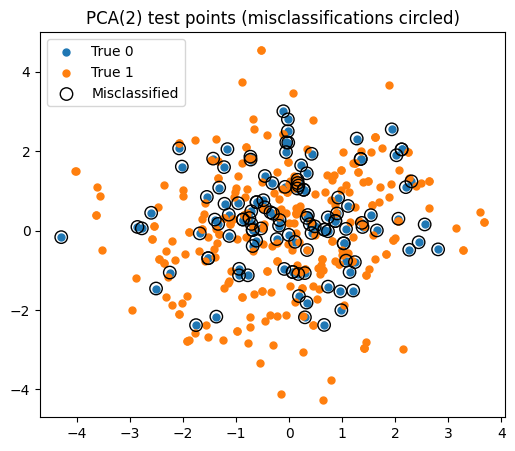

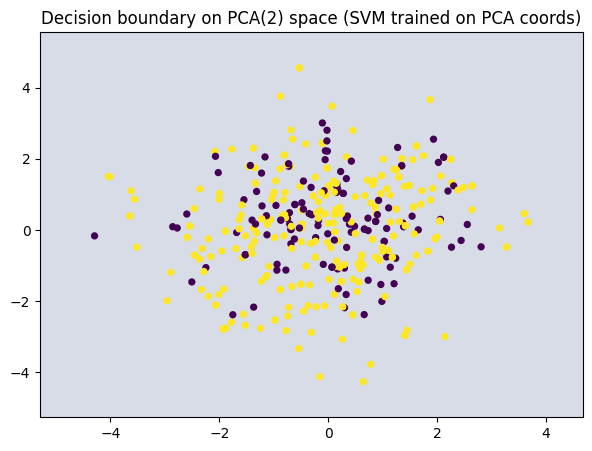

In [41]:
# Visualization of SVM results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on PCA space (visualization)
svc_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_pca.fit(X_train_pca, Y_train)
y_pred_pca = svc_pca.predict(X_test_pca)

# scatter test points, highlight misclassified
plt.figure(figsize=(6,5))
for label in np.unique(Y_test):
    idx = (Y_test == label)
    plt.scatter(X_test_pca[idx,0], X_test_pca[idx,1], label=f"True {label}", s=25)
mis = Y_test != y_pred_pca
if mis.any():
    plt.scatter(X_test_pca[mis,0], X_test_pca[mis,1], facecolors='none', edgecolors='k', s=80, label='Misclassified')
plt.legend(); plt.title('PCA(2) test points (misclassifications circled)'); plt.show()

# Decision boundary (low-res grid)
x_min, x_max = X_test_pca[:,0].min()-1, X_test_pca[:,0].max()+1
y_min, y_max = X_test_pca[:,1].min()-1, X_test_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 120), np.linspace(y_min, y_max, 120))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svc_pca.predict(grid).reshape(xx.shape)
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=Y_test, s=18)
plt.title('Decision boundary on PCA(2) space (SVM trained on PCA coords)')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    {'kernel': ['poly'], 'C': [0.1, 1], 'degree': [2, 3]}
]

grid = GridSearchCV(SVC(random_state=42), param_grid, scoring='f1_macro', cv=4, n_jobs=-1)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_
y_best = best_model.predict(X_test)
print("Test accuracy (best):", accuracy_score(Y_test, y_best))
print(classification_report(Y_test, y_best))

Best params: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Test accuracy (best): 0.8575
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400



In [43]:
# Comparison and Analysis
from time import time
kernels = {
    'linear': SVC(kernel='linear', C=1.0, random_state=42),
    'poly': SVC(kernel='poly', C=1.0, degree=3, random_state=42),
    'rbf': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
}

results = {}
for name, model in kernels.items():
    t0 = time()
    model.fit(X_train, Y_train)
    t1 = time()
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(Y_test, y_pred),
        'report': classification_report(Y_test, y_pred, output_dict=True),
        'train_time_s': t1 - t0
    }

for k, v in results.items():
    print(f"\nKernel {k}: Accuracy {v['accuracy']:.4f}, train_time {v['train_time_s']:.2f}s")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Kernel linear: Accuracy 0.7000, train_time 0.94s

Kernel poly: Accuracy 0.8575, train_time 0.17s

Kernel rbf: Accuracy 0.8275, train_time 0.33s
